In [1]:
import pandas as pd
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read CSV data into a pandas DataFrame
steps_data = pd.read_csv('steps.csv', sep=';')
survey_data = pd.read_csv('survey.csv') # using semi-colon as separator

# If you want to replace all the blank entries with NaN
steps_data = steps_data.replace(r'^\s*$', np.nan, regex=True)
steps_data = steps_data.replace(np.nan, 0, regex=True)

df_all = pd.merge(steps_data, survey_data, on='id')
# Find duplicate columns
duplicate_columns = df_all.columns[df_all.columns.duplicated()]

# Select unique columns
df = df_all.loc[:, ~df_all.columns.duplicated()]

# Print the unique columns
print(df.head())

   id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0   1        0.0        0.0        0.0        0.0     3941.0    15733.0   
1   2        0.0        0.0    10473.0      705.0     4287.0     5507.0   
2   3        0.0    11428.0    12523.0     2553.0      190.0     2164.0   
3   4        0.0        0.0        0.0        0.0        0.0        0.0   
4   5        0.0        0.0        0.0        0.0        0.0        0.0   

   26-6-2013  27-6-2013  28-6-2013  ...  12-5-2014  13-5-2014         city  \
0     9929.0    12879.0    10541.0  ...        0.0        0.0     Bordeaux   
1     4024.0     3926.0    14595.0  ...        0.0        0.0        Lille   
2     8185.0     9630.0     8983.0  ...     1129.0        0.0  Montpellier   
3        0.0        0.0        0.0  ...        0.0        0.0         Lyon   
4        0.0        0.0        0.0  ...        0.0        0.0  Montpellier   

   gender    age  hh_size  education          education_1  height  weight  
0   

In [2]:
# create a list of column names for the step data
step_columns = df.columns[df.columns.str.contains('-')]

# use .loc to select the step data, and then calculate the mean to give more insight into the data
df['mean_steps'] = df.loc[:, step_columns].mean(axis=1)

print(df.head())

   id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0   1        0.0        0.0        0.0        0.0     3941.0    15733.0   
1   2        0.0        0.0    10473.0      705.0     4287.0     5507.0   
2   3        0.0    11428.0    12523.0     2553.0      190.0     2164.0   
3   4        0.0        0.0        0.0        0.0        0.0        0.0   
4   5        0.0        0.0        0.0        0.0        0.0        0.0   

   26-6-2013  27-6-2013  28-6-2013  ...  13-5-2014         city  gender  \
0     9929.0    12879.0    10541.0  ...        0.0     Bordeaux    Male   
1     4024.0     3926.0    14595.0  ...        0.0        Lille    Male   
2     8185.0     9630.0     8983.0  ...        0.0  Montpellier    Male   
3        0.0        0.0        0.0  ...        0.0         Lyon    Male   
4        0.0        0.0        0.0  ...        0.0  Montpellier  Female   

     age  hh_size  education          education_1  height  weight   mean_steps  
0  25-34        4

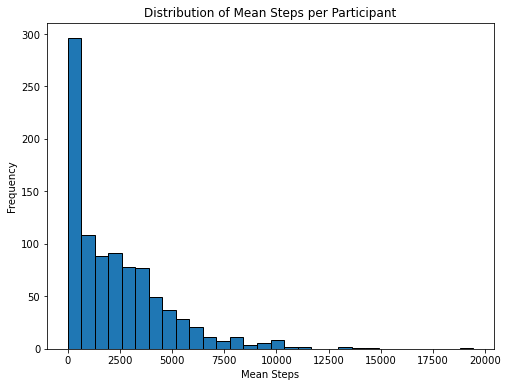

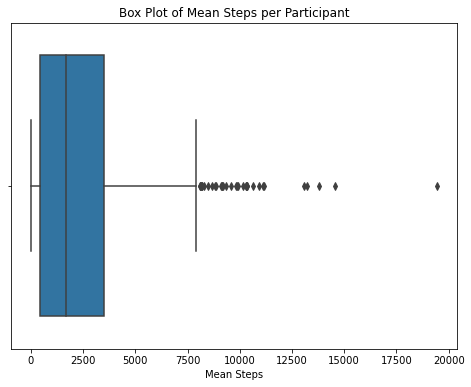

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram This code plots the histogram graph based on the average steps taken
plt.figure(figsize=(8, 6))
plt.hist(df['mean_steps'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Mean Steps per Participant')
plt.xlabel('Mean Steps')
plt.ylabel('Frequency')
plt.show()

# Boxplot This code plots the boxplot graph based on the data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['mean_steps'].dropna())
plt.title('Box Plot of Mean Steps per Participant')
plt.xlabel('Mean Steps')
plt.show()


In [4]:
#the majority of people are around 2000 steps with a couple people going above and beyond with steps

#a trick shown to me by the developer, to give insights through numbers

summary_stats = df['mean_steps'].describe()
print(summary_stats)

count      929.000000
mean      2363.586761
std       2431.995662
min          0.000000
25%        433.917683
50%       1697.426829
75%       3493.890244
max      19430.237805
Name: mean_steps, dtype: float64


In [5]:
# Mean
mean = df['mean_steps'].mean()
print('Mean: ', mean)

# Median
median = df['mean_steps'].median()
print('Median: ', median)

# Standard Deviation
std_dev = df['mean_steps'].std()
print('Standard Deviation: ', std_dev)


Mean:  2363.5867606132983
Median:  1697.4268292682927
Standard Deviation:  2431.9956622789755


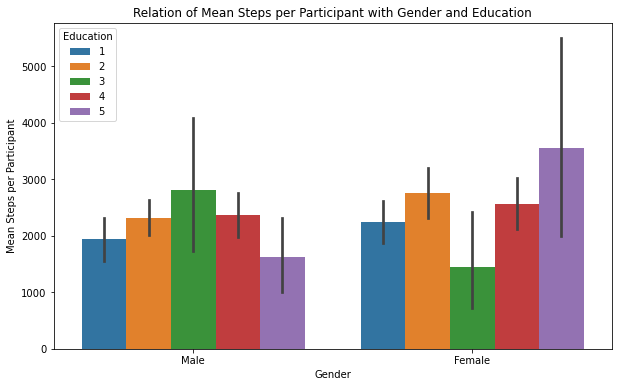

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the relation between mean steps, gender, and education still getting error
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='gender', y='mean_steps', hue='education')
plt.xlabel('Gender')
plt.ylabel('Mean Steps per Participant')
plt.title('Relation of Mean Steps per Participant with Gender and Education')
plt.legend(title='Education')
plt.show()


#overview, to take a step back and think wat to compare gender and types of education. 


In [7]:
# BMI is a measure of body fat based on an individual's weight and height. It is calculated by dividing the weight (in kilograms) by the square of the height (in meters).

# To compute the BMI variable, you can use the following formula:

# BMI = weight (kg) / (height (m) * height (m))

# Convert height to meters
df['height_m'] = df['height'] / 100

# Compute BMI
df['BMI'] = df['weight'] / (df['height_m'] ** 2)
print(df.head())

   id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0   1        0.0        0.0        0.0        0.0     3941.0    15733.0   
1   2        0.0        0.0    10473.0      705.0     4287.0     5507.0   
2   3        0.0    11428.0    12523.0     2553.0      190.0     2164.0   
3   4        0.0        0.0        0.0        0.0        0.0        0.0   
4   5        0.0        0.0        0.0        0.0        0.0        0.0   

   26-6-2013  27-6-2013  28-6-2013  ...  gender    age  hh_size  education  \
0     9929.0    12879.0    10541.0  ...    Male  25-34        4          4   
1     4024.0     3926.0    14595.0  ...    Male  35-44        1          3   
2     8185.0     9630.0     8983.0  ...    Male  25-34        2          2   
3        0.0        0.0        0.0  ...    Male    <25        1          1   
4        0.0        0.0        0.0  ...  Female  25-34        3          4   

           education_1  height  weight   mean_steps  height_m        BMI  
0  Ma

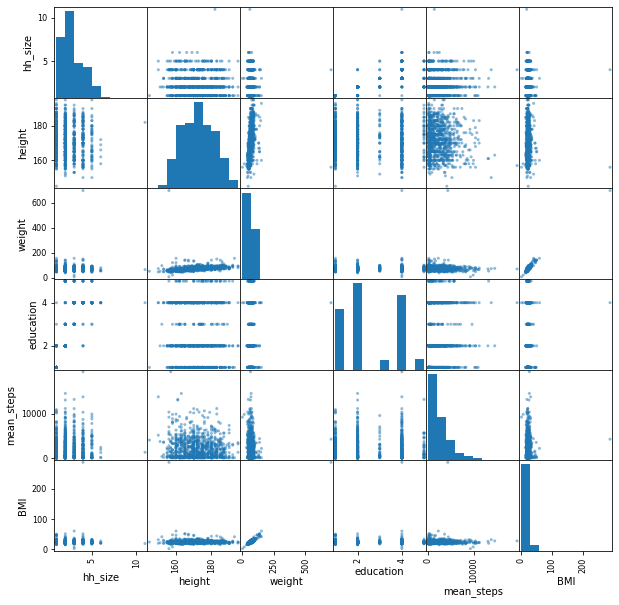

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Select the numerical variables from the DataFrame
numerical_vars = ['age', 'hh_size', 'height', 'weight', 'education', 'mean_steps','BMI']

# Create a subset DataFrame with only the numerical variables
numerical_df = df[numerical_vars]

# Create the scatterplot matrix
scatter_matrix(numerical_df, figsize=(10, 10), diagonal='hist')

# Display the plot
plt.show()


In [9]:
# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Print the correlation scores
print(correlation_matrix)

             hh_size    height    weight  education  mean_steps       BMI
hh_size     1.000000 -0.059704  0.036468   0.825585    0.044081  0.053290
height     -0.059704  1.000000  0.265138  -0.046343   -0.086988 -0.032015
weight      0.036468  0.265138  1.000000   0.029968   -0.044127  0.951323
education   0.825585 -0.046343  0.029968   1.000000    0.035661  0.041897
mean_steps  0.044081 -0.086988 -0.044127   0.035661    1.000000 -0.014876
BMI         0.053290 -0.032015  0.951323   0.041897   -0.014876  1.000000


In [10]:
# Linear regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship and finds the best-fitting line to represent the data. The slope and intercept of the line determine the impact of the independent variable on the dependent variable. Linear regression is used for prediction and understanding the strength and direction of relationships. Assumptions such as linearity and independence of errors should be validated.

In [11]:
import pandas as pd

dummy_gender = pd.get_dummies(df['gender'], prefix='gender', drop_first=True)
dummy_education = pd.get_dummies(df['education'], prefix='education', drop_first=True)
dummy_education1 = pd.get_dummies(df['education_1'], prefix='education_1', drop_first=True)
dummy_city = pd.get_dummies(df['city'], prefix='city', drop_first=True)
dummy_age = pd.get_dummies(df['age'], prefix='age', drop_first=True)


# Concatenate the dummy variables with the original dataframe
df = pd.concat([df, dummy_gender, dummy_education, dummy_education1, dummy_city, dummy_age], axis=1)

# Drop the original categorical variables from the dataframe
df.drop(['gender', 'education', 'city', 'age', 'education_1'], axis=1, inplace=True)


print(df.head())

   id  20-6-2013  21-6-2013  22-6-2013  23-6-2013  24-6-2013  25-6-2013  \
0   1        0.0        0.0        0.0        0.0     3941.0    15733.0   
1   2        0.0        0.0    10473.0      705.0     4287.0     5507.0   
2   3        0.0    11428.0    12523.0     2553.0      190.0     2164.0   
3   4        0.0        0.0        0.0        0.0        0.0        0.0   
4   5        0.0        0.0        0.0        0.0        0.0        0.0   

   26-6-2013  27-6-2013  28-6-2013  ...  education_1_Primary  \
0     9929.0    12879.0    10541.0  ...                    0   
1     4024.0     3926.0    14595.0  ...                    0   
2     8185.0     9630.0     8983.0  ...                    0   
3        0.0        0.0        0.0  ...                    0   
4        0.0        0.0        0.0  ...                    0   

   education_1_Vocational  city_Lille  city_Lyon  city_Montpellier  age_35-44  \
0                       0           0          0                 0          0   
1 

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#replacing nan values with mean, because it was giving error's for the invalid erros of creating the model

df.dropna(inplace=True)
df.fillna(df.mean(), inplace=True)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df.drop('mean_steps', axis=1), df['mean_steps'], test_size=0.2, random_state=42)

# Create an instance of the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict the mean steps on the testing data
y_pred = model.predict(x_test)


In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 1.0


In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 3.90633589733447e-12


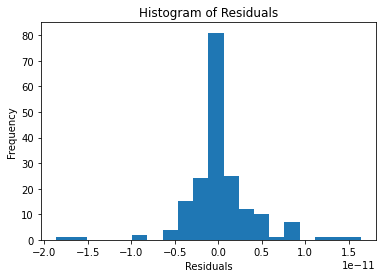

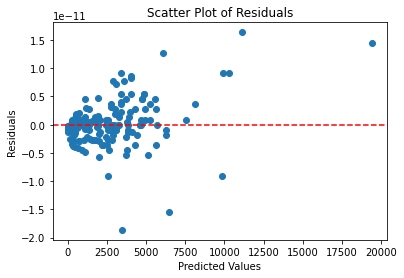

In [15]:
residuals = y_test - y_pred

# Histogram of residuals
import matplotlib.pyplot as plt
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.show()

# Scatter plot of residuals vs predicted values
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Scatter Plot of Residuals")
plt.show()


#Analyzing the residuals can provide insights into the model's performance. If the residuals are randomly scattered around zero and follow a normal distribution, it indicates that the model has captured the underlying patterns well. However, if there are patterns or systematic deviations in the residuals, it suggests that the model may have some limitations.

In [ ]:
# 80 percent of the predicted data and original data is accurate. the predicted values are mostly inrange of 500 to 4000. with one person having 20000 predicted steps